In [1]:
# Import Python Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import scipy.io
import sys
import zarr

# Import Local Library

sys.path.append('src')
from Building import *
from util import *

In [2]:
# Load Inundation File (SFINCS)

parent_path = os.path.dirname(os.getcwd())    # Change based on directory setup. Current data: ../pyDF/data/
flood = []
for i in np.arange(6, 106):
    floodi = scipy.io.loadmat(
        parent_path
        + "\\pyDF\\NYC_case_study\\InundationNYC\\results_0618\\flood_{}.mat".format(i)
    )["zsmax"]
    floodi = np.nan_to_num(floodi)
    flood.append(floodi)

In [3]:
# Load NYC Building Database (Map Pluto)

df_bld_elev = pd.read_csv(parent_path + "\\pyDF\\data\\nybuilding.csv")   # Load building base elevation data
df_bld_elev = df_bld_elev.drop_duplicates(subset = "BBL")
df_pluto = pd.read_csv(parent_path + "\\pyDF\\data\\pluto.csv")    # Load building property data
df_pluto = df_pluto.rename(columns={"bbl": "BBL"})
df_pluto["BBL"] = df_pluto["BBL"].astype("int64")
df_pluto = df_pluto.drop_duplicates(subset = "BBL")
df_comp_pluto = pd.merge(df_bld_elev, df_pluto, on="BBL", how="inner")    # Merge dataframe with BBL

# Clean-up columns
df_comp_pluto = df_comp_pluto[["BBL", "longitude", "latitude", "HEIGHT_ROO", "GROUND_ELE",
               "bldgarea", "NUM_FLOORS", "numbldgs", "bldgclass"]]

C:\Users\willi\AppData\Local\Temp\ipykernel_14816\2854645990.py:5: DtypeWarning: Columns (21,22,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pluto = pd.read_csv(parent_path + "\\pyDF\\data\\pluto.csv")    # Load building property data


In [4]:
# Load NYC Building Database (nyBES)

df_bld_ffelev = pd.read_csv(parent_path + "\\pyDF\\data\\nyBES_2023.csv")    # Load building first floor elevation data
df_bld_ffelev = df_bld_ffelev.rename(columns={"bbl": "BBL"})
df_bld_ffelev["BBL"] = df_bld_ffelev["BBL"].astype("int64")
df_bld_ffelev = df_bld_ffelev.drop_duplicates(subset = "BBL")
df_comp_bes = pd.merge(df_bld_ffelev, df_comp_pluto, on="BBL", how="right") # Merge dataframe with BBL

# Clean-up columns
df_comp_bes = df_comp_bes[["BBL", "longitude_y", "latitude_y", "HEIGHT_ROO", "GROUND_ELE", "z_floor",
               "bldgarea", "NUM_FLOORS", "numbldgs", "bldgclass"]]

In [5]:
df_comp_pluto

,BBL,longitude,latitude,HEIGHT_ROO,GROUND_ELE,bldgarea,NUM_FLOORS,numbldgs,bldgclass
0,4155980564,-73.742614,40.599153,26.528548,6,2250.0,2.0,1.0,A1
1,4163500400,-73.920731,40.556880,17.947245,8,1600000.0,1.0,1854.0,A8
2,4160290023,-73.798397,40.598219,14.242060,6,1196.0,2.0,2.0,A1
3,4163250001,-73.874426,40.566583,14.529230,16,50000.0,2.0,14.0,Q1
4,4160900043,-73.803338,40.589521,42.447070,7,2905.0,3.0,1.0,B2
...,...,...,...,...,...,...,...,...,...
791529,2023750048,-73.914613,40.818626,25.060000,20,9852.0,2.0,1.0,K2
791530,2025120051,-73.928258,40.833105,33.730000,116,2712.0,3.0,1.0,B9
791531,2027620117,-73.886680,40.817775,25.810000,55,2380.0,2.0,1.0,B1
791532,2050090074,-73.848456,40.893699,19.080000,104,704.0,1.0,1.0,A2


In [6]:
df_comp_bes

,BBL,longitude_y,latitude_y,HEIGHT_ROO,GROUND_ELE,z_floor,bldgarea,NUM_FLOORS,numbldgs,bldgclass
0,4155980564,-73.742614,40.599153,26.528548,6,10.384,2250.0,2.0,1.0,A1
1,4163500400,-73.920731,40.556880,17.947245,8,0.000,1600000.0,1.0,1854.0,A8
2,4160290023,-73.798397,40.598219,14.242060,6,10.955,1196.0,2.0,2.0,A1
3,4163250001,-73.874426,40.566583,14.529230,16,0.000,50000.0,2.0,14.0,Q1
4,4160900043,-73.803338,40.589521,42.447070,7,10.201,2905.0,3.0,1.0,B2
...,...,...,...,...,...,...,...,...,...,...
791529,2023750048,-73.914613,40.818626,25.060000,20,19.220,9852.0,2.0,1.0,K2
791530,2025120051,-73.928258,40.833105,33.730000,116,116.904,2712.0,3.0,1.0,B9
791531,2027620117,-73.886680,40.817775,25.810000,55,54.823,2380.0,2.0,1.0,B1
791532,2050090074,-73.848456,40.893699,19.080000,104,107.593,704.0,1.0,1.0,A2


In [7]:
# Generate building dictionary

region_pluto = {}
for index, row in df_comp_pluto.iterrows():
    bldgarea = row["bldgarea"]
    height = row["HEIGHT_ROO"]
    elev = row["GROUND_ELE"]
    cls = row["bldgclass"]
    numfloor = row["NUM_FLOORS"]
    numbldg = row["numbldgs"]
    lon = row["longitude"]
    lat = row["latitude"]
    x = 0
    y = 0
    building = Building(bldgarea, height, elev, cls, numfloor, numbldg, lat, lon, x, y)
    region_pluto[index] = building

In [8]:
# Generate building dictionary

region_bes = {}
for index, row in df_comp_bes.iterrows():
    bldgarea = row["bldgarea"]
    height = row["HEIGHT_ROO"]
    elev = max(row["GROUND_ELE"], row["z_floor"])
    cls = row["bldgclass"]
    numfloor = row["NUM_FLOORS"]
    numbldg = row["numbldgs"]
    lon = row["longitude_y"]
    lat = row["latitude_y"]
    x = 0
    y = 0
    building = Building(bldgarea, height, elev, cls, numfloor, numbldg, lat, lon, x, y)
    region_bes[index] = building

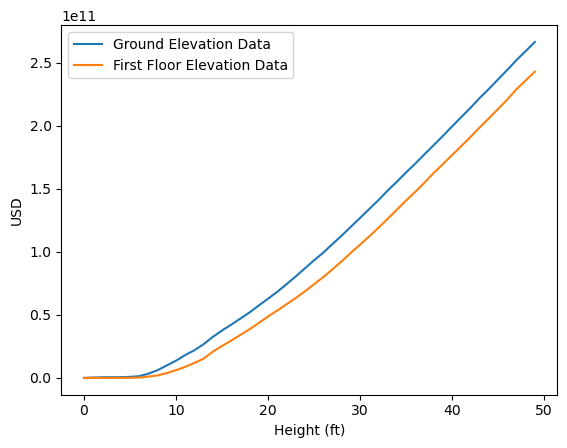

In [9]:
d = []
f = []
for i in np.arange(50):
    d.append(get_total_damage(region_pluto, flood_elev=i))
    f.append(get_total_damage(region_bes, flood_elev=i))
plt.plot(np.arange(50), d, label = "Ground Elevation Data")
plt.plot(np.arange(50), f, label = "First Floor Elevation Data")
plt.xlabel("Height (ft)")
plt.ylabel("USD")
plt.legend()

Text(0.5, 0, 'Height (ft)')

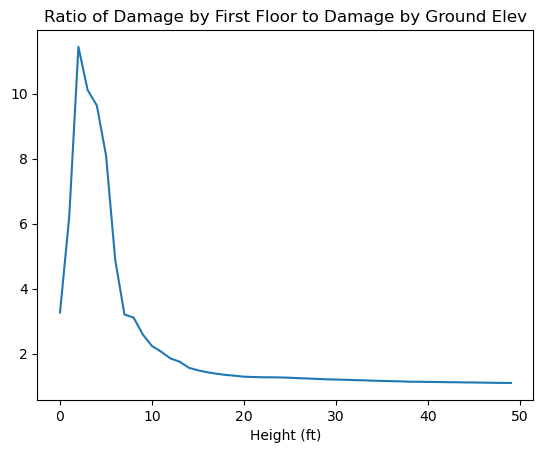

In [10]:
plt.plot(np.arange(50), np.divide(d,f))
plt.title("Ratio of Damage by First Floor to Damage by Ground Elev")
plt.xlabel('Height (ft)')